In [1]:
import json
import numpy as np
from csc.utils import *
from csc.atoms import *
from csc.dictionary import *
from itertools import product
import matplotlib.pyplot as plt

# Atom parameters
bmin = 0.005
bmax = 0.60
b_step = 0.005
b_values = np.arange(bmin, bmax, b_step)

ymin = 0.01
ymax = 0.034
y_step = 0.002
y_values = np.arange(ymin, ymax, y_step)

s_values = [1]

dictionary = ZSDictionary.from_values(b_values, y_values, s_values)
print('The dictionary has {} different atoms'.format(len(dictionary)))

The dictionary has 1428 different atoms


In [2]:
path_to_db = 'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\synthetic_data\\signals_db10.json'

In [3]:
with open(path_to_db, 'r') as f:
    signals_db = json.load(f)

In [4]:
print(len(signals_db))
idx = list()
for signal in signals_db :
    idx.append(signal['id'])
print(max(idx))

150
149


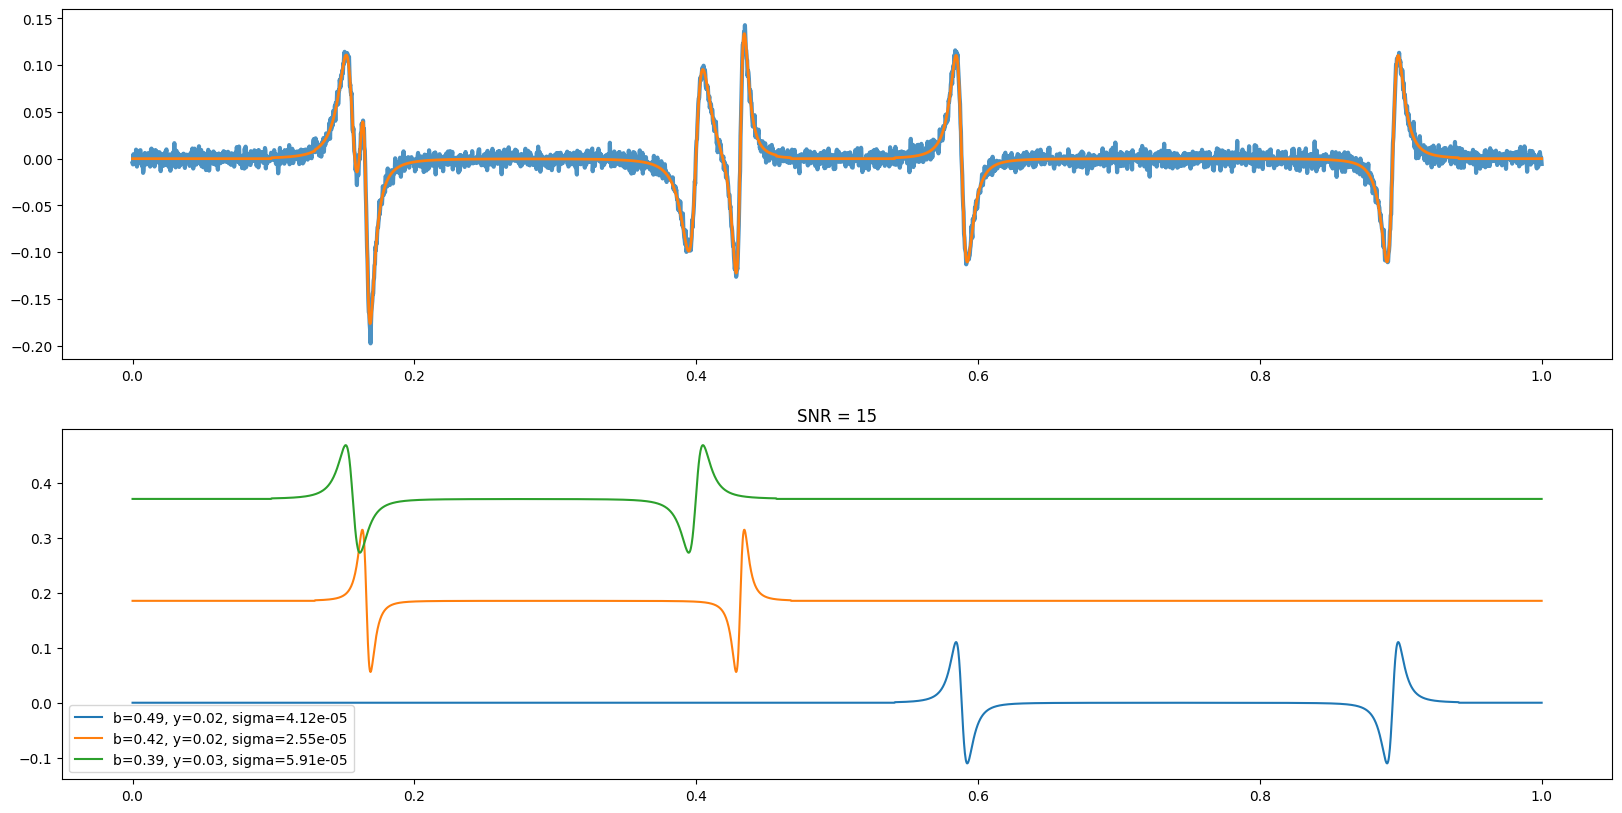

In [19]:
fig, axs = plt.subplots(2, 1, figsize=(20, 10))

s0 = signals_db[121]
atoms = s0['atoms']
x = np.linspace(0, 1, len(s0['signal']))
axs[0].plot(x, s0['signal'], alpha=0.8, label='signal', lw=3)

offset = np.max(s0['signal'])*1.3
signal = np.zeros(len(s0['signal']))
for i, atom in enumerate(atoms) :
    zs_atom = dictionary.getAtomFromParams(atom['b'], atom['y'], atom['s'])
    if zs_atom is not None :
        atom_in_signal = zs_atom.getAtomInSignal(len(s0['signal']), atom['x'])
        signal += atom_in_signal
        axs[1].plot(x, atom_in_signal + offset*i, label=str(zs_atom))

axs[0].plot(x, signal, label='reconstructed signal', lw=2)
axs[1].set_title('SNR = {}'.format(s0['snr']))
axs[1].legend()
plt.show()

In [20]:
approx, infos = dictionary.omp(s0['signal'], len(s0['atoms']), verbose=True)

OMP 1/3
OMP 2/3
OMP 3/3


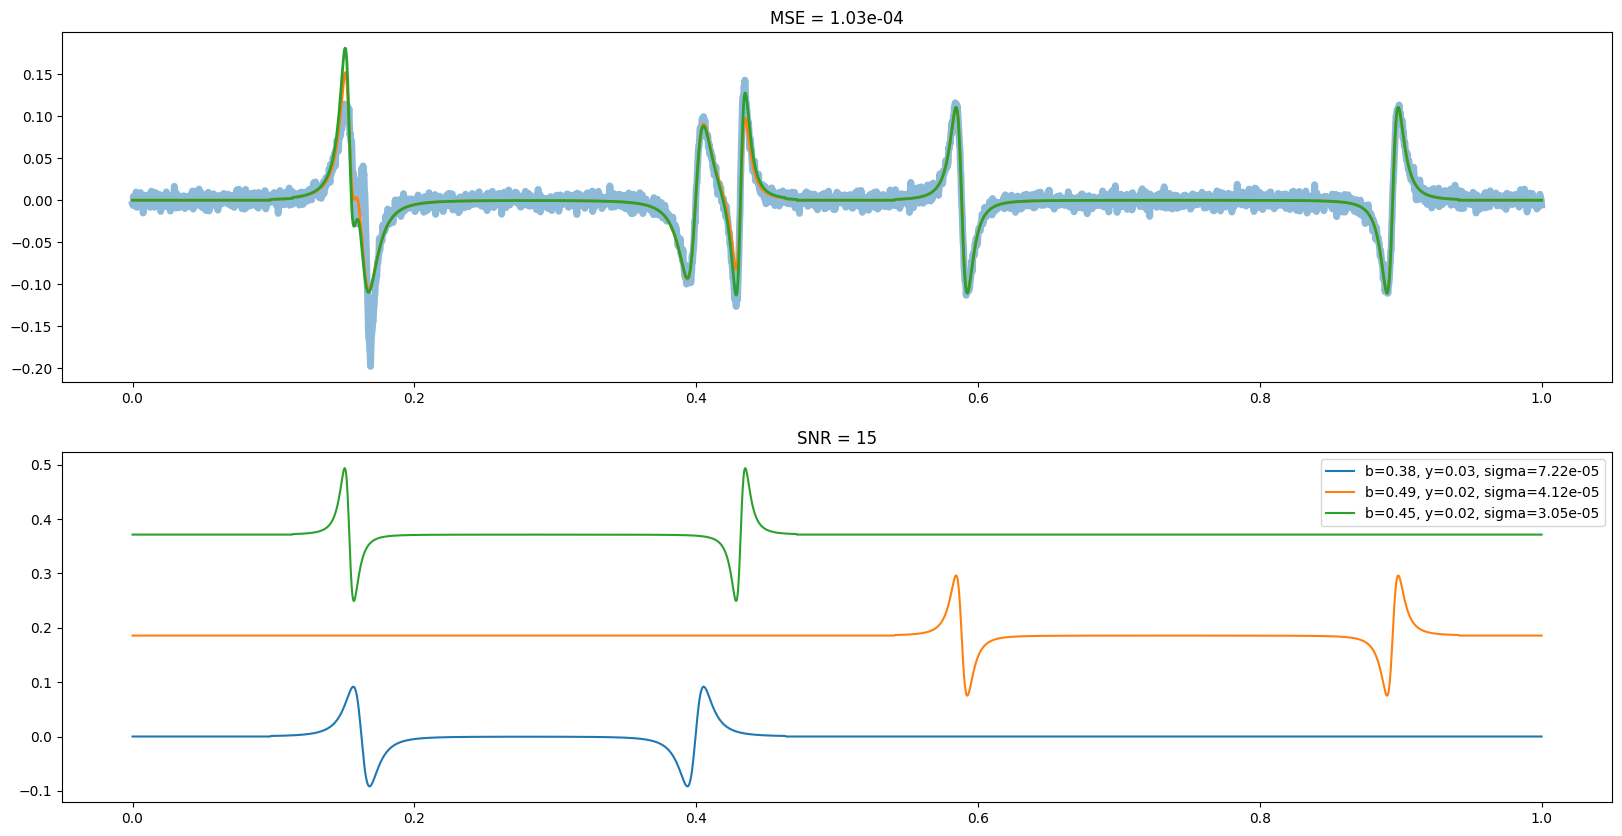

In [23]:
fig, axs = plt.subplots(2, 1, figsize=(20, 10))

axs[0].plot(x, s0['signal'], alpha=0.5, label='signal', lw=5)
axs[0].plot(x, approx, label='approximation', lw=2)
mse = np.mean((s0['signal'] - approx)**2)
axs[0].set_title('MSE = {:.2e}'.format(mse))

offset = np.max(s0['signal'])*1.3
signal = np.zeros(len(s0['signal']))
for i, atom in enumerate(infos) :
    zs_atom = dictionary.getAtomFromParam(atom['b'], atom['y'], atom['s'])
    if zs_atom is not None :
        atom_in_signal = zs_atom.getAtomInSignal(len(s0['signal']), atom['x'])
        signal += atom_in_signal
        axs[1].plot(x, atom_in_signal + offset*i, label=str(zs_atom))

axs[0].plot(x, signal, label='reconstructed signal', lw=2)
axs[1].set_title('SNR = {}'.format(s0['snr']))
axs[1].legend()
plt.show()

In [24]:
omp_result = {
    'id' : s0['id'],
    'mse' : mse,
    'sparsity' : len(infos),
    'approx' : approx.tolist(),
    'atoms' : infos
}